In [63]:
# !pip3 install tensorflow-gpu==2.0.0-alpha
# !pip3 install split-folders

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import split_folders
import numpy as np
import cv2
import os

In [6]:
print(os.listdir("/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real_and_fake_face_detection"))


['.DS_Store', 'real_and_fake_face']


In [7]:
real = "/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real_and_fake_face_detection/real_and_fake_face/training_real/"
fake = "/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real_and_fake_face_detection/real_and_fake_face/training_fake/"

real_path = os.listdir(real)
fake_path = os.listdir(fake)

In [8]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (224, 224))
    return image[...,::-1]

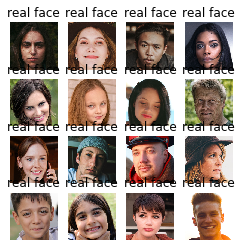

In [9]:
fig = plt.figure(figsize=(4, 4))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(real + real_path[i]), cmap='gray')
    plt.title("real face")
    plt.axis('off')

plt.show()

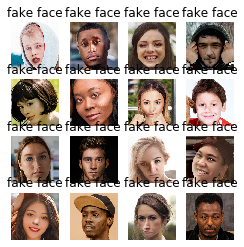

In [10]:
fig = plt.figure(figsize=(4, 4))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(fake + fake_path[i]), cmap='gray')
    plt.title("fake face")
    plt.axis('off')

plt.show()

In [11]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   vertical_flip=False,
                                   rescale=1./255,
                                   )

In [12]:
dataset_path = "/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real_and_fake_face_detection/real_and_fake_face"


In [13]:
train = train_datagen.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(96, 96),
                                          batch_size=32)

Found 2041 images belonging to 2 classes.


In [14]:
mobilenetV2 = MobileNetV2(input_shape=(96, 96, 3),
                          include_top=False,
                          weights='imagenet'
                          )

average_layer = GlobalAveragePooling2D()

model = Sequential([mobilenetV2,
                    average_layer,
                    Dense(256, activation=tf.nn.relu),
                    BatchNormalization(),
                    Dropout(0.2),
                    Dense(2, activation=tf.nn.softmax)
                   ])

In [15]:
model.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
def scheduler(epoch):
    if epoch <= 2:
        return 0.001
    elif epoch > 2 and epoch <= 15:
        return 0.0001 
    else:
        return 0.00001

lr_callbacks = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [17]:
model.fit_generator(train,
                    epochs=50,
                    callbacks=[lr_callbacks])

Epoch 1/50
64/64 [==============================] - 57s 885ms/step - loss: 1.1203 - accuracy: 0.5625
Epoch 2/50
64/64 [==============================] - 56s 876ms/step - loss: 0.7255 - accuracy: 0.6262
Epoch 3/50
64/64 [==============================] - 56s 876ms/step - loss: 0.6003 - accuracy: 0.7016
Epoch 4/50
64/64 [==============================] - 56s 878ms/step - loss: 0.4653 - accuracy: 0.7780
Epoch 5/50
64/64 [==============================] - 59s 920ms/step - loss: 0.3850 - accuracy: 0.8212
Epoch 6/50
64/64 [==============================] - 60s 941ms/step - loss: 0.3475 - accuracy: 0.8427
Epoch 7/50
64/64 [==============================] - 59s 923ms/step - loss: 0.3040 - accuracy: 0.8731
Epoch 8/50
64/64 [==============================] - 60s 935ms/step - loss: 0.2512 - accuracy: 0.8996
Epoch 9/50
64/64 [==============================] - 62s 972ms/step - loss: 0.2094 - accuracy: 0.9118
Epoch 10/50
64/64 [==============================] - 59s 925ms/step - loss: 0.1641 - accura

In [18]:
model.evaluate_generator(train)

[0.0017355756726828986, 1.0]

In [19]:
model.save("model.h5")

In [28]:
def load_img2(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (96, 96))
    return image[...,::-1]

In [29]:
img1 = load_img2('/Users/zhongyizhang/Desktop/ZhongyiZhang.jpg')

In [30]:
img1 = img1.reshape((1, 96, 96, 3))

In [32]:
img1 = np.array(img1).astype(np.float32)

In [34]:
# pred1 = model.predict(img1)
print(np.argmax(model.predict(img1)))

1


In [36]:
img2 = load_img2('/Users/zhongyizhang/Desktop/ZhongyiZhang_old.jpg')

In [37]:
img2 = img2.reshape((1, 96, 96, 3))
img2 = np.array(img2).astype(np.float32)
print(np.argmax(model.predict(img2)))

1


In [38]:
img3 = load_img2('/Users/zhongyizhang/Desktop/Nature1.jpeg')
img3 = img3.reshape((1, 96, 96, 3))
img3 = np.array(img3).astype(np.float32)
print(np.argmax(model.predict(img3)))

1


In [55]:
img4 = load_img2('/Users/zhongyizhang/Desktop/Deep Learning & Image Recognition/DL Final Project/real-and-fake-face-detection/real_and_fake_face/training_real/real_00207.jpg')
img4 = img4.reshape((1, 96, 96, 3))
img4 = np.array(img4).astype(np.float32)
print(np.argmax(model.predict(img4)))

1


In [62]:
model.predict(img2)

array([[1.4852120e-04, 9.9985147e-01]], dtype=float32)